In [ ]:
분류 평가
TP, FP, FN, TN는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
앞문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정/긍정을 의미
TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
FP는 예측값을 Positive 값 1로 예측했고 실제값은 Negative 값 0
FN은 예측값을 Negative 값 0으로 예측했고 실제값은 Positive 값 1
TP는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1
정확도 = (TP + TN) / ( TP + TN + FP + FN)
정밀도 = TP / ( TP + FP)
재현율 = TP / ( TP + FN)
F1 = 2 ( 정밀도 * 재현율) / (정밀도 + 재현율) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐.
정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단 - 암인데 암이 아니라고 진단하면 FN이 증가하고 재현율이 떨어진다)
정밀도가 더 중요한 지표인 사례는 스팸 메일 여부를 판단하는 경우로 스팸 메일이 아닌데 스팸 메일로 분류해서 업무 차질 발생(스팸이 아닌데 스팸으로 분류하면 FP 증가하고 정밀도가 떨어진다)

In [ ]:
정밀도/제현율 트레이드오프
정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
정밀도와 재현율은 한쪽을 높이면 다른 하나의 수치는 낮아지므로 트레이드오프(Trade-off) 관계임

In [ ]:
예측 확률을 반환하는 predict_proba()
사이킷런 분류 알고리즘은 예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구함
그리고 예측 확률이 큰 레이블 값으로 예측
이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측되었다면 최종 예측은 더 큰 확률을 가진 1로 예측
이진 분류에서는 이 임곗값을 0.5로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정함
사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_prob()를 제공 - 학습이 완료된 사이킷런 Classifier 객체에서 호출
predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과임

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [71]:
df = pd.read_csv('./dataset/tdf4.csv')
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Fare,Age_0,Age_1,Age_2,Age_3,Age_4,Embark_0,Embark_1,Embark_2,Family_0,Family_1,Family_2
0,0,0,3,1,1,1,0,0,0,0,0,0,1,0,0,1
1,1,1,1,0,2,1,0,0,0,0,1,0,0,0,0,1
2,2,1,3,0,1,1,0,0,0,0,0,0,1,1,0,0
3,3,1,1,0,2,1,0,0,0,0,0,0,1,0,0,1
4,4,0,3,1,1,1,0,0,0,0,0,0,1,1,0,0


In [72]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y = df['Survived']
X = df.drop('Survived',axis=1)
# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.2,random_state=10) 

In [73]:
from sklearn.metrics import accuracy_score
import warnings 

# 라이브러리
warnings.filterwarnings('ignore')

LR_clf = LogisticRegression()
LR_clf.fit(X_train, y_train)
LR_clf_pred = LR_clf.predict(X_test)

LR_accuracy = accuracy_score(y_test, LR_clf_pred)
print('LR 예측 정확도 :', round(LR_accuracy,3))

LR 예측 정확도 : 0.831


In [ ]:
# 0.5를 기준으로 해서 큰쪽으로 결정

In [74]:
pred_proba = LR_clf.predict_proba(X_test)
pred = LR_clf.predict(X_test)

print('pred_proba()결과 shape:{0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

print('pred에서 앞 3개만 샘플로 추출 \n:', pred[:3])
print('pred.reshape(-1,1)에서 앞 3개만 샘플로 추출 \n:', 
      pred.reshape(-1,1)[:3])

pred_proba()결과 shape:(178, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.21313002 0.78686998]
 [0.56669837 0.43330163]
 [0.8864919  0.1135081 ]]
pred에서 앞 3개만 샘플로 추출 
: [1 0 0]
pred.reshape(-1,1)에서 앞 3개만 샘플로 추출 
: [[1]
 [0]
 [0]]


In [23]:
# concatnate
# pd.concat
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
pred_proba_result

array([[0.21313002, 0.78686998, 1.        ],
       [0.56669837, 0.43330163, 0.        ],
       [0.8864919 , 0.1135081 , 0.        ],
       [0.09912233, 0.90087767, 1.        ],
       [0.83839184, 0.16160816, 0.        ],
       [0.75565849, 0.24434151, 0.        ],
       [0.35615234, 0.64384766, 1.        ],
       [0.28573358, 0.71426642, 1.        ],
       [0.8686717 , 0.1313283 , 0.        ],
       [0.78923671, 0.21076329, 0.        ],
       [0.52994183, 0.47005817, 0.        ],
       [0.07621721, 0.92378279, 1.        ],
       [0.90018706, 0.09981294, 0.        ],
       [0.87822565, 0.12177435, 0.        ],
       [0.73112488, 0.26887512, 0.        ],
       [0.89414998, 0.10585002, 0.        ],
       [0.09767525, 0.90232475, 1.        ],
       [0.88396368, 0.11603632, 0.        ],
       [0.89251337, 0.10748663, 0.        ],
       [0.58865546, 0.41134454, 0.        ],
       [0.90158747, 0.09841253, 0.        ],
       [0.84184935, 0.15815065, 0.        ],
       [0.

In [76]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

# threshold(임계값) 기준값보다 같거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
# 임계값과 비교해서 0,1 반환
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [77]:
X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

# threshold(임계값) 기준값보다 같거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold=2)
# 임계값과 비교해서 0,1 반환
print(binarizer.fit_transform(X))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
# Binarize data (set feature values to 0 or 1) according to a threshold.

In [27]:
print(Binarizer().fit_transform(X))

[[1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


In [79]:
# 생존 확률을 선택해서 임계값 0.5 기준으로 예측
custom_threshold = 0.5
print(pred_proba[0:5])
print()
# 생존 확률 추출 후 2차원 배열로 변환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print(pred_proba_1[0:5])
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict[0:5]

[[0.21313002 0.78686998]
 [0.56669837 0.43330163]
 [0.8864919  0.1135081 ]
 [0.09912233 0.90087767]
 [0.83839184 0.16160816]]

[[0.78686998]
 [0.43330163]
 [0.1135081 ]
 [0.90087767]
 [0.16160816]]


array([[1.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [37]:
#생존 확률을 선택해서 임계값 0.5를 기준으로 예측
custom_threshold = 0.5
print(pred_proba[:5])
print()
# 생존 확률 추출 후 2차원 배열로 전환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print(pred_proba_1[0:5])
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict[:5]

[[0.21313002 0.78686998]
 [0.56669837 0.43330163]
 [0.8864919  0.1135081 ]
 [0.09912233 0.90087767]
 [0.83839184 0.16160816]]

[[0.78686998]
 [0.43330163]
 [0.1135081 ]
 [0.90087767]
 [0.16160816]]


array([[1.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, \
                            f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, f1 score:{3:.4f}'.format(accuracy, precision, recall, f1))

                                                                  
get_clf_eval(y_test, custom_predict)

오차행렬
[[103  12]
 [ 18  45]]
정확도:0.8315, 정밀도:0.7895, 재현율:0.7143, f1 score:0.7500


In [84]:
# 직접 구해보기
# 정확도: 0.83146
# 정밀도: 0.7894
# 재현율: 0.71428
# f1 score:0.7469

In [49]:
# 임계값을 내리면 positive 예측을 많이 할 수 있음
custom_treshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print(pred_proba[:,1].shape)
print(pred_proba[:,1].reshape(-1,1).shape)

(178,)
(178, 1)


In [45]:
# 임계값을 내리면 positive 예측을 많이 할 수 있음
custom_treshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[103  12]
 [ 18  45]]
정확도:0.8315, 정밀도:0.7895, 재현율:0.7143, f1 score:0.7500


In [48]:
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
# 임계값에 따라서 재현율, 정밀도를 조절할 수 있다.

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # threholds list 객체 내의 값을 차례로 iteration하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        
        get_clf_eval(y_test, custom_predict)
        print()
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차행렬
[[97 18]
 [11 52]]
정확도:0.8371, 정밀도:0.7429, 재현율:0.8254, f1 score:0.7820

임계값: 0.45
오차행렬
[[99 16]
 [17 46]]
정확도:0.8146, 정밀도:0.7419, 재현율:0.7302, f1 score:0.7360

임계값: 0.5
오차행렬
[[103  12]
 [ 18  45]]
정확도:0.8315, 정밀도:0.7895, 재현율:0.7143, f1 score:0.7500

임계값: 0.55
오차행렬
[[105  10]
 [ 19  44]]
정확도:0.8371, 정밀도:0.8148, 재현율:0.6984, f1 score:0.7521

임계값: 0.6
오차행렬
[[106   9]
 [ 23  40]]
정확도:0.8202, 정밀도:0.8163, 재현율:0.6349, f1 score:0.7143



In [86]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = LR_clf.predict_proba(X_test)[:,1]

# 실제값 데이터셋과 레이블값이 1일때의 예측확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print(thresholds.shape)

thr_index = np.arange(0,thresholds.shape[0],15)
print(thr_index)
print('임계값:',np.round(thresholds[thr_index],2))

# 15 step 단위의 추출된 임계값에 따른 정밀도와 재현율 
print('정밀도:',np.round(precisions[thr_index],3))
print('재현율:',np.round(recalls[thr_index],3))

(174,)
[  0  15  30  45  60  75  90 105 120 135 150 165]
임계값: [0.04 0.1  0.11 0.11 0.12 0.17 0.24 0.41 0.55 0.64 0.79 0.91]
정밀도: [0.362 0.384 0.424 0.457 0.509 0.566 0.655 0.754 0.815 0.872 0.958 1.   ]
재현율: [1.    0.968 0.968 0.937 0.921 0.889 0.873 0.825 0.698 0.54  0.365 0.143]


In [87]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precision,recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', \
             label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    # x축 y축 label과 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    # x축 y축 label과 legend, grid 설정
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall Value')
    plt.legend();plt.grid()
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

NameError: name 'lr_clf' is not defined

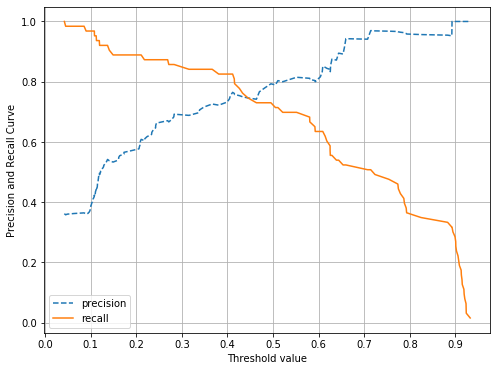

In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # x축 y축 label과 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축 y축 label과 grid설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall Curve')
    plt.legend(), plt.grid()
    
precision_recall_curve_plot(y_test, LR_clf.predict_proba(X_test)[:, 1])

In [ ]:
결과 해석
임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 낮아짐.(FN이 작아지고 FP가 커짐)
로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임곗값이 약 0.45 지점에서 재현율과 정밀도가 비슷해지는 모습을 보임.
단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용하는 것은 지양하고 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용

In [ ]:
정밀도 및 재현율 활용시 유의 사항
정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작이 가능
정밀도 100%가 되는 방법: 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측 전체 환자 1000명중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 P로 예측하고 나머지는 모두 N으로 예측 FP는 0, TP는 1이 되며 정밀도(TP/(TP+FP)는 1/(1+0) = 1
재현율이 100%가 되는 방법: 모든 환자를 Positive로 예측 1000명의 환자중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 0이므로 재현율(TP/(TP+FN)은 30/(30+0) = 1
분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨
암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 부담과 불평이 커지게 됨

In [ ]:
OC 곡선과 AUC
수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표.
FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1- 특이성(TNR), TPR은 재현율(민감도)를 나타냄.
TNR은 TN/(TN+FP)이며 FPR은 FP/(TN+FP)임
ROC 곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR값의 변화에 따른 TPR의 변화 값을 구함.
FPR을 0에서 1까지 변경하는 것은 Positive 예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨.
FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임곗값을 0으로 지정하면 됨.

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

pred_proba_c1 = LR_clf.predict_proba(X_test)[:,1]
fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
thr_index=np.arange(1,thresholds.shape[0],5)
print(np.round(thresholds[thr_index],2))
print(np.round(fprs[thr_index],2))
print(np.round(tprs[thr_index],2))

[0.93 0.66 0.63 0.51 0.38 0.27 0.12 0.11 0.02]
[0.   0.02 0.06 0.1  0.17 0.23 0.52 0.72 1.  ]
[0.02 0.52 0.56 0.71 0.83 0.87 0.92 0.97 1.  ]


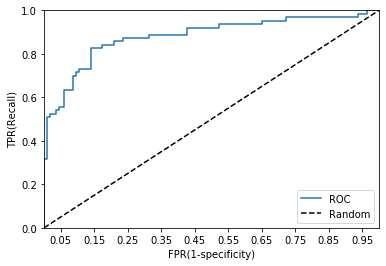

In [91]:
# ROC_Curve는 임계값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커지는데
# FPR이 조금씩 커질 때 TPR은 가파르게 커짐을 알 수 있음
# AUC가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건b
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 fpr, tpr값을 반환 받음
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
    # roc curve를 plot 곡선으로 그림
    plt.plot(fprs,tprs,label='ROC')
    # 가운데 대각선 직선을 그림 
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    #FPR X축의 스케일을 0.1 단위로 변경, X,Y 축 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-specificity)');plt.ylabel('TPR(Recall)')
    plt.legend()
roc_curve_plot(y_test,LR_clf.predict_proba(X_test)[:,1])

In [93]:
from sklearn.metrics import roc_auc_score
pred = LR_clf.predict(X_test)
roc_score = roc_auc_score(y_test,pred)
print('ROC AUC 값:{0:.4f}'.format(roc_score))

ROC AUC 값:0.8050


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, \
    f1 score:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))
    
get_clf_eval(y_test,pred)

오차행렬
[[103  12]
 [ 18  45]]
정확도:0.8315, 정밀도:0.7895, 재현율:0.7143,     f1 score:0.7500, AUC:0.8050
